In [247]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")
plt.style.use('seaborn-white')

import numpy as np
import pandas as pd

from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures
from pandas.plotting import scatter_matrix

In [248]:
ames = pd.read_csv('data/ames_housing.csv', index_col=0)

In [93]:
ames.head(20)

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
6,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000
7,20,RL,75.0,10084,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,307000
8,60,RL,NaN,10382,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,Shed,350,11,2009,WD,Normal,200000
9,50,RM,51.0,6120,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,4,2008,WD,Abnorml,129900


In [249]:
ames.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1460 entries, 1 to 1460
Data columns (total 80 columns):
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-null object
Exterior2nd      1460 non-

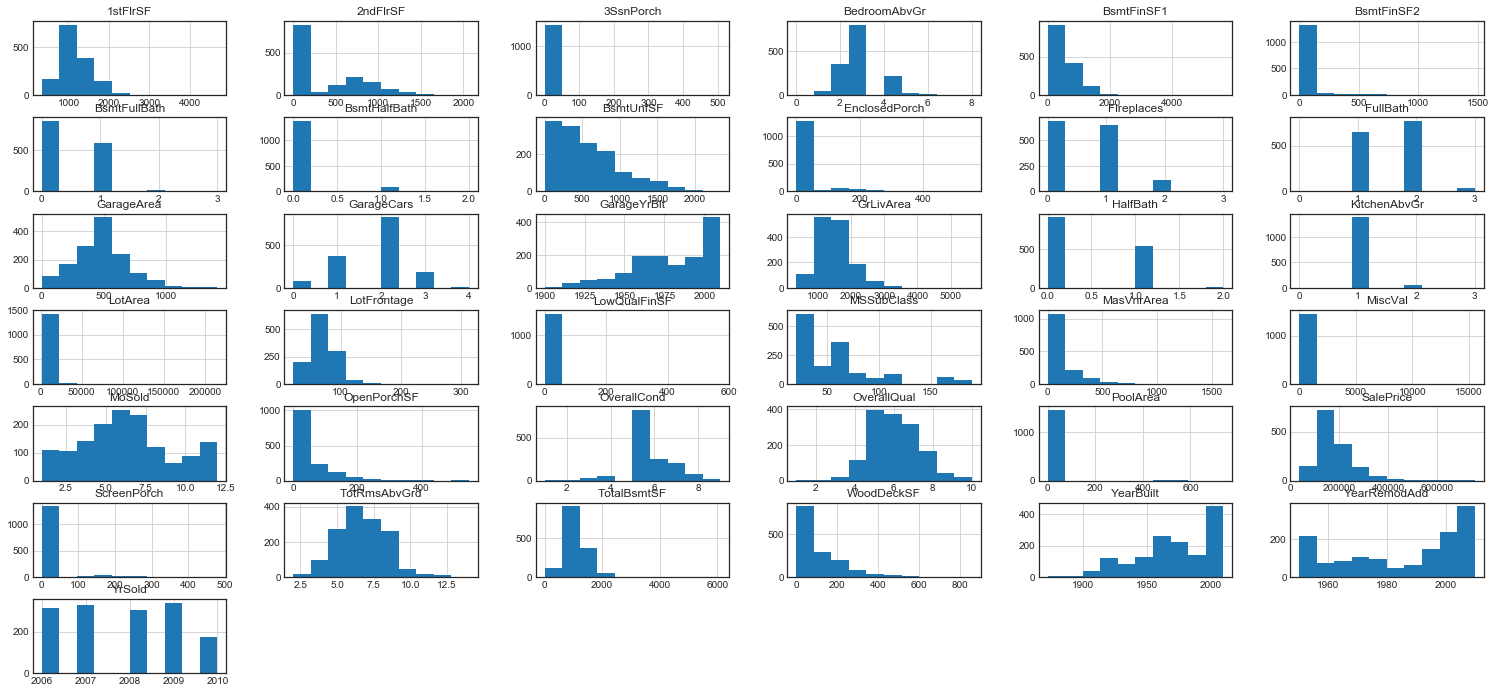

In [95]:
ames.hist(bins=10, figsize=(26,12));

In [250]:
ames = ames.replace({"BsmtCond": {"No": 0, "Po": 1, "Fa": 2, "TA": 3, "Gd": 4, "Ex": 5}})
ames = ames.replace({"BsmtQual" : {"No" : 0, "Po" : 1, "Fa" : 2, "TA": 3, "Gd" : 4, "Ex" : 5}})
ames['BsmtQual'].fillna(1, inplace=True)

In [251]:
ames['BsmtQual'].value_counts()

3.0    649
4.0    618
5.0    121
1.0     37
2.0     35
Name: BsmtQual, dtype: int64

In [252]:
ames['Alley'].fillna('None', inplace = True)

In [253]:
ames['Alley'].value_counts()

None    1369
Grvl      50
Pave      41
Name: Alley, dtype: int64

In [254]:
ames['OveralStatus'] = ames['OverallCond'] * ames['OverallQual']

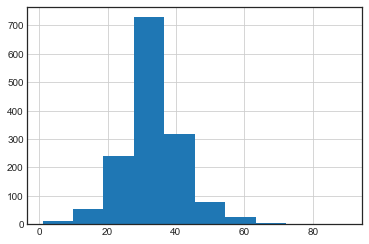

In [255]:
ames['OveralStatus'].hist()

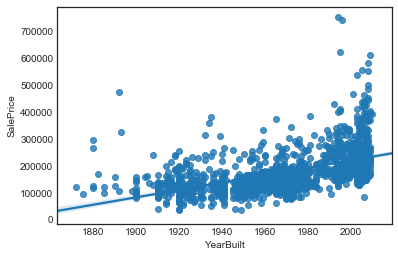

In [256]:
sns.regplot(ames.YearBuilt, ames.SalePrice)

In [257]:
pipe = make_pipeline(PolynomialFeatures(degree=2), LinearRegression())

In [258]:
pipe.fit(ames.YearBuilt.values.reshape(-1,1),ames.SalePrice)
pipe.named_steps

{'polynomialfeatures': PolynomialFeatures(degree=2, include_bias=True, interaction_only=False),
 'linearregression': LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)}

In [259]:
coefs = pipe.named_steps.linearregression.coef_

In [260]:
coefs

array([ 0.00000000e+00, -8.47261672e+04,  2.19421059e+01])

In [261]:
# Now we split the data into the X and y variable. 
# We must split the data before creating the train and test models. 

In [262]:
y = ames['SalePrice']
X = ames.drop('SalePrice', axis = 1)

In [263]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1460 entries, 1 to 1460
Data columns (total 80 columns):
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            1460 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-null object
Exterior2nd      1460 no

In [264]:
corr = pd.DataFrame(ames.corr())

In [265]:
corr['SalePrice'].sort_values()

KitchenAbvGr    -0.135907
EnclosedPorch   -0.128578
MSSubClass      -0.084284
OverallCond     -0.077856
YrSold          -0.028923
LowQualFinSF    -0.025606
MiscVal         -0.021190
BsmtHalfBath    -0.016844
BsmtFinSF2      -0.011378
3SsnPorch        0.044584
MoSold           0.046432
PoolArea         0.092404
ScreenPorch      0.111447
BsmtCond         0.160658
BedroomAbvGr     0.168213
BsmtUnfSF        0.214479
BsmtFullBath     0.227122
LotArea          0.263843
HalfBath         0.284108
OpenPorchSF      0.315856
2ndFlrSF         0.319334
WoodDeckSF       0.324413
LotFrontage      0.351799
BsmtFinSF1       0.386420
Fireplaces       0.466929
MasVnrArea       0.477493
GarageYrBlt      0.486362
YearRemodAdd     0.507101
YearBuilt        0.522897
TotRmsAbvGrd     0.533723
FullBath         0.560664
OveralStatus     0.565294
1stFlrSF         0.605852
TotalBsmtSF      0.613581
BsmtQual         0.622925
GarageArea       0.623431
GarageCars       0.640409
GrLivArea        0.708624
OverallQual 

In [266]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1460 entries, 1 to 1460
Data columns (total 80 columns):
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            1460 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-null object
Exterior2nd      1460 no

In [268]:
X['OverallCond'].value_counts()

5    821
6    252
7    205
8     72
4     57
3     25
9     22
2      5
1      1
Name: OverallCond, dtype: int64

In [269]:
X['OverallQual'].value_counts()

5     397
6     374
7     319
8     168
4     116
9      43
3      20
10     18
2       3
1       2
Name: OverallQual, dtype: int64

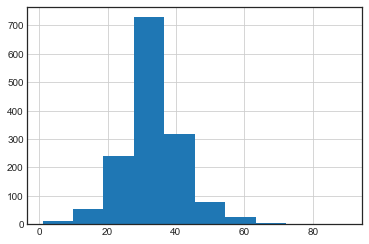

In [270]:
X['OveralStatus'].hist()

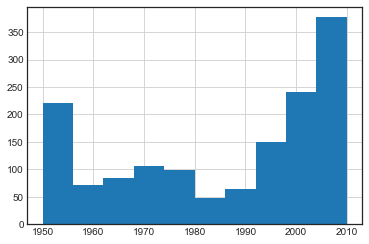

In [271]:
X['YearRemodAdd'].hist()

In [272]:
X.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,OveralStatus
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,None,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,35
2,20,RL,80.0,9600,Pave,None,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,48
3,60,RL,68.0,11250,Pave,None,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,35
4,70,RL,60.0,9550,Pave,None,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,35
5,60,RL,84.0,14260,Pave,None,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,40


In [294]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [322]:
def basic_lr_fit(X_train,y_train, X_test, y_test):
    sns.regplot(X_train, y_train)
    lr = LinearRegression()
    lr.fit(X_train, y_train)
    y_pred = lr.predict(X_test)
    score=lr.score(X_test,y_test)
    mse = mean_squared_error(y_pred,y_test)
    rmse = np.sqrt(mean_squared_error(y_pred,y_test))
    print("The score is :{:.2f}".format(score), "\nThe RMSE is :{:.2f}".format(rmse))

In [296]:
X_train, X_test, y_train, y_test = train_test_split(X,y)

The score is :0.48 
The RMSE is :62243.69


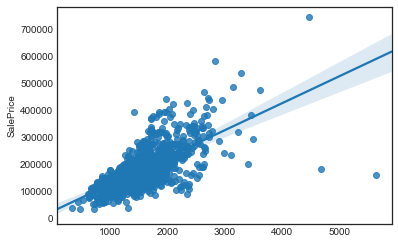

In [297]:
basic_lr_fit(X_train['GrLivArea'].values.reshape(-1,1), y_train, X_test['GrLivArea'].values.reshape(-1,1), y_test)

The score is :0.27 
The RMSE is :77596.64


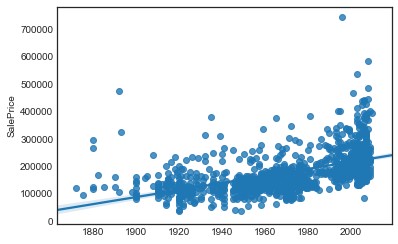

In [298]:
basic_lr_fit(X_train['YearBuilt'].values.reshape(-1,1), y_train, X_test['YearBuilt'].values.reshape(-1,1), y_test)

The score is :0.32 
The RMSE is :75729.25


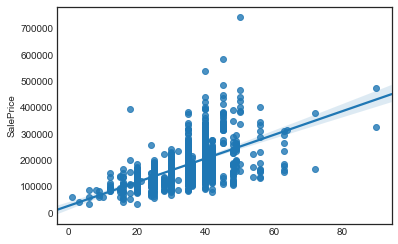

In [299]:
basic_lr_fit(X_train['OveralStatus'].values.reshape(-1,1), y_train, X_test['OveralStatus'].values.reshape(-1,1), y_test)

In [ ]:
X_

In [306]:
ridge_reg = Ridge(alpha = 1)

In [308]:
ridge_reg.fit(X_train[['GrLivArea','OveralStatus', 'GarageCars']], y_train)

Ridge(alpha=1, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

In [309]:
pipe = make_pipeline(StandardScaler(),Ridge())

In [310]:
params = {'ridge__alpha': [0.1, 1.0, 4.0, 10.0, 100.0]}

In [311]:
grid = GridSearchCV(pipe, param_grid = params, cv=5)

In [314]:
grid.fit(X_train[['GrLivArea','OveralStatus', 'GarageCars']], y_train)

GridSearchCV(cv=5, error_score='raise',
       estimator=Pipeline(memory=None,
     steps=[('standardscaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('ridge', Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001))]),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'ridge__alpha': [0.1, 1.0, 4.0, 10.0, 100.0]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [315]:
best = grid.best_estimator_

In [316]:
best

Pipeline(memory=None,
     steps=[('standardscaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('ridge', Ridge(alpha=10.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001))])

In [318]:
pred = best.predict(X_test[['GrLivArea','OveralStatus', 'GarageCars']])
mean_squared_error(pred, y_test)

2884290343.5954514

In [321]:
grid.score(X_test[['GrLivArea','OveralStatus', 'GarageCars']],y_test)

0.6482816714793481